# Seminario de Ciencia de Datos

## 2º Cuatrimestre de 2017

## Módulo 2 - Series Temporales

### Integrantes:

- Mascitti, Julio Augusto - 954/11 - mascittija@gmail.com

- Aleman, Damián - 377/10 - damianaleman@gmail.com

- Guerson, Matias Carlos - 925/10 - matias.guerson@gmail.com

#### Introducción

En este trabajo tenemos por objetivo trabajar con series temporlaes y grandes volúmenes de datos. Para lo mismo la catedra nos porporcionó un set de datos de Electroencefalogramas (EGGs) de 20 pacientes divididos en 2 grupos distinguibles. Estos datos fueron recolectados de mediciones realizadas por 256 electrodos ubicados en un casco que se conecta al paciente. El experimento conciste en estimular a los distintos pacientes conectados a los cascos para poder medir su reacción ante dichos estímulos.

Para más detalles leer el enunciado, que cuenta con información sobre la técnica de electroencefalografía y detalles sobre la implementación del experimento.

https://gist.github.com/fraimondo/57990372c3c8a87c2c1bd290bffaa46f

### Analisis preliminar de los datos
- Computar uno de los posibles análisis espectrales.


Vamos a tomarnos un tiempo para analizar la estructura de datos de la cual disponemos y como está dividida la información, para comprender como manipularla para conseguir lo que necesitamos en los sucesivos experimentos.

In [3]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy.stats import entropy
import scipy.io as io
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

from os import path

Importando los datos del primer paciente para familiarizarnos un poco con la información que disponemos

In [11]:
# path = "../../../../"
path = "./"

data = io.loadmat('{}data/P01.mat'.format(path))

matriz = data['data']
print(matriz.shape)
print(len(matriz))   # x = epochs
print(len(matriz[0]))   # y = electrodos
print(len(matriz[0][0]))   # z = muestras 

(894, 256, 201)
894
256
201


Tenemos una matriz por paciente con 894 Epochs, 256 electrodos y 201 muestras

In [5]:
electrodo8 = matriz[:,7,:]
print(electrodo8.shape)
print(electrodo8)

(894, 201)
[[ -1.89886281e-06  -1.00840373e-06   1.25017794e-06 ...,  -1.99776241e-05
   -1.88884188e-05  -1.71967869e-05]
 [ -4.72398852e-07  -6.27877221e-07  -1.48793420e-06 ...,  -4.96553432e-06
   -3.87947002e-06  -2.04118703e-06]
 [  6.30377343e-06   6.41721957e-06   6.73830393e-06 ...,   1.12358613e-05
    1.10880283e-05   9.89908993e-06]
 ..., 
 [ -1.08579175e-05  -1.06884899e-05  -1.05058022e-05 ...,  -1.88950742e-05
   -1.90880988e-05  -1.96135828e-05]
 [  5.97367336e-06   5.57200265e-06   5.13112625e-06 ...,   7.58558137e-06
    7.25155993e-06   6.95669955e-06]
 [  4.19202506e-08   1.75269527e-08   3.08250725e-07 ...,   1.90975674e-05
    1.96474922e-05   2.04587491e-05]]


El experimento conciste en estimular al paciente y ver su reacción a través de las mediciones captadas por los electrodos del EGG.

La grabación continua de 30 minutos es cortada tomando como parámetro el inicio de la estimulación auditiva (T0). Cada segmento (denominado epoch o trial) tiene una duración de 1.54 segundos y comienza 200 ms antes de T0. En otras palabras, cada epoch comienza en -0.200s y termina en 1.34s donde 0s es la ocurrencia de un estímulo auditivo.

Algo interesante para ver, puede ser el promedio de los voltajes de los epochs para las 201 mediciones que tiene cada epoch para un electrodo en particular

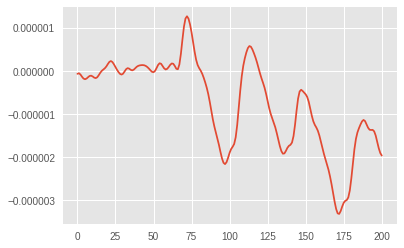

In [19]:
epoch_promedio = electrodo8.mean(axis=0)
plt.plot(epoch_promedio)

plt.show()

Calculemos Welch al Epoch_Promedio y veamos que podemos observar

[   0.            1.24378109    2.48756219    3.73134328    4.97512438
    6.21890547    7.46268657    8.70646766    9.95024876   11.19402985
   12.43781095   13.68159204   14.92537313   16.16915423   17.41293532
   18.65671642   19.90049751   21.14427861   22.3880597    23.6318408
   24.87562189   26.11940299   27.36318408   28.60696517   29.85074627
   31.09452736   32.33830846   33.58208955   34.82587065   36.06965174
   37.31343284   38.55721393   39.80099502   41.04477612   42.28855721
   43.53233831   44.7761194    46.0199005    47.26368159   48.50746269
   49.75124378   50.99502488   52.23880597   53.48258706   54.72636816
   55.97014925   57.21393035   58.45771144   59.70149254   60.94527363
   62.18905473   63.43283582   64.67661692   65.92039801   67.1641791
   68.4079602    69.65174129   70.89552239   72.13930348   73.38308458
   74.62686567   75.87064677   77.11442786   78.35820896   79.60199005
   80.84577114   82.08955224   83.33333333   84.57711443   85.82089552
   87.06

/home/julio/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


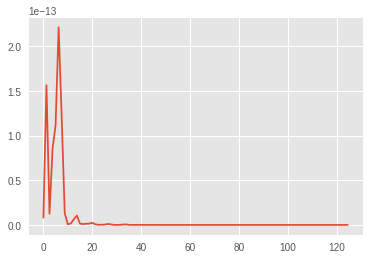

In [18]:
frec, power = signal.welch(x= epoch_promedio,fs = 250)
print(frec)
plt.plot(frec, power)
plt.show()

Podemos apreciar un pico alrededor de lo 10 Hz

## Análisis de frecuencias

- Calcular la media entre los electrodos 8, 44, 80, 131 y 185 (el primer electrodo es el 0) y realizar una figura que muestre las frecuencias en el eje Y, los epochs en el eje X, y la potencia usando una escala de color.

In [8]:
from matplotlib.colors import LogNorm


electrodo44 = matriz[:,43,:]
electrodo80 = matriz[:,79,:]
electrodo131 = matriz[:,130,:]
electrodo185 = matriz[:,184,:]

elec_promedio = np.array([electrodo8,electrodo44,electrodo80,electrodo131,electrodo185]).mean(axis=0)
print(elec_promedio.shape)


welchs = np.zeros((894,2,101))
for i_epoch in range(len(elec_promedio)):
    welchs[i_epoch] = signal.welch(x=elec_promedio[i_epoch], fs=250)
print(welchs.shape)    

potencias = welchs[:,1,:42]


(894, 201)
(894, 2, 101)


/home/julio/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


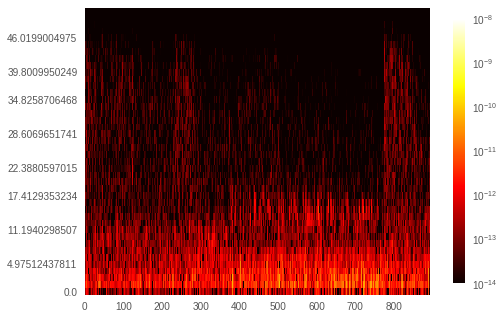

In [9]:
plt.axes([1,1,1,1])
plt.grid(False)
yticks = np.linspace(0,len(potencias[0]),10, dtype=np.int)
plt.yticks(yticks, welchs[0,0,yticks])
plt.imshow(potencias.T, interpolation='nearest', cmap='hot', origin='lower', aspect='auto', norm=LogNorm(vmin=1.0e-14, vmax=1.0e-08))
plt.colorbar(shrink=.92)

plt.show()

Podemos ver como las frecuencias bajas tienen mayor potencia que las altas en el gráfico anterior

- Calcular la potencia media (entre epochs) para cada frecuencia y graficar la potencia en funcion de la frecuencia para cada canal.

In [10]:
welchs_by_elect_and_epoch = np.empty((256,894,2,101))

for i_epoch in range(len(matriz)):
    epoch = matriz[i_epoch]
    for i_elect in range(len(epoch)):
        f,p = signal.welch(x=epoch[i_elect], fs=250)
        welchs_by_elect_and_epoch[i_elect,i_epoch] = np.array([f,p])

/home/julio/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


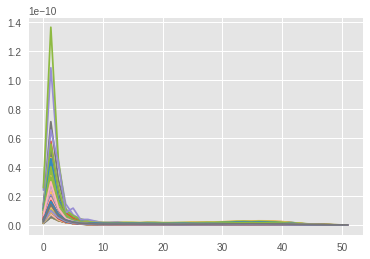

In [16]:
power_mean_between_epochs = welchs_by_elect_and_epoch.mean(axis=1)

for elect in power_mean_between_epochs:
    plt.plot(elect[0,:42], elect[1,:42])


plt.show()

- Calcular los valores de cada banda de frecuencia, promediados entre los electrodos (todos) y epochs para cada sujeto.

Vamos a calcular las medias de todas las potencias para cada rango de frecuencias, y almacenarlas en archivos para no tener que recalcularlo cada vez que las necesitemos

In [22]:
def calculate_welchs(data):
    welchs_by_elect_and_epoch = np.empty((256,len(data),2,101))

    for i_epoch in range(len(data)):
        epoch = data[i_epoch]
        for i_elect in range(len(epoch)):
            f,p = signal.welch(x=epoch[i_elect], fs=250)
            welchs_by_elect_and_epoch[i_elect,i_epoch] = np.array([f,p])
    
    return welchs_by_elect_and_epoch

In [23]:
def calculate_power_mean(welchs_by_elect_and_epoch, frequency_range):
    freqs = welchs_by_elect_and_epoch[0,0,0,:]
    alphas_idxs = np.where((freqs>=frequency_range[0]) * (freqs<frequency_range[1]))
    alphas = welchs_by_elect_and_epoch[:,:,1,alphas_idxs]
    alphas = alphas[:,:,0,:]
    return alphas.mean()

In [40]:
for t in ['P','S']:
    for i in range(1,11):
        try:
            data_file = path.join('./data/',t) + "%02d" % (i) + '.mat'
            welch_file = 'welch_' + t + "%02d" % (i) + '.dmp'
            print(data_file)
            print(welch_file)
            data = io.loadmat(data_file)['data']
            print(data.shape)
            welch = calculate_welchs(data)
            welch.dump(welch_file)
        except Exception as exception:
            print(str(exception))
            pass


./data/P01.mat
welch_P01.dmp
(894, 256, 201)


/home/julio/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


./data/P02.mat
welch_P02.dmp
(687, 256, 201)
./data/P03.mat
welch_P03.dmp
(700, 256, 201)
./data/P04.mat
welch_P04.dmp
(1596, 256, 201)
./data/P05.mat
welch_P05.dmp
(857, 256, 201)
./data/P06.mat
welch_P06.dmp
(944, 256, 201)
./data/P07.mat
welch_P07.dmp
(947, 256, 201)
./data/P08.mat
welch_P08.dmp
(901, 256, 201)
./data/P09.mat
welch_P09.dmp
(539, 256, 201)
./data/P10.mat
welch_P10.dmp
(931, 256, 201)
./data/S01.mat
welch_S01.dmp
(657, 256, 201)
./data/S02.mat
welch_S02.dmp
(407, 256, 201)
./data/S03.mat
welch_S03.dmp
(809, 256, 201)
./data/S04.mat
welch_S04.dmp
(746, 256, 201)
./data/S05.mat
welch_S05.dmp
(697, 256, 201)
./data/S06.mat
welch_S06.dmp
(769, 256, 201)
./data/S07.mat
welch_S07.dmp
(789, 256, 201)
./data/S08.mat
welch_S08.dmp
(800, 256, 201)
./data/S09.mat
welch_S09.dmp
(628, 256, 201)
./data/S10.mat
welch_S10.dmp
(767, 256, 201)


In [41]:
def load_welchs_and_calculate_power_means(frequency_range):

    power_means = np.zeros((2,10))

    for t in ['P','S']:
        for i in range(1,11):
            try:
                welch_file = 'welch_' + t + "%02d" % (i) + '.dmp'
                print(welch_file)
                data = np.load(welch_file)
                print(data.shape)
                power_mean = calculate_power_mean(data, frequency_range)
                row = 0 if(t == 'P') else 1
                power_means[row, i-1] = power_mean
            except Exception as exception:
                print(str(exception))
                pass

    print(repr(power_means))
    return power_means

In [42]:
frequencies_ranges = {"delta": (0,4), "theta": (4,8), "alpha": (8,13), "beta": (13,30), "gamma": (30,125)}

for name,frequency_range in frequencies_ranges.items():
    frequency_power_means = load_welchs_and_calculate_power_means(frequency_range)
    frequency_power_means.dump(name + 'power_means.dmp')


welch_P01.dmp
(256, 894, 2, 101)
welch_P02.dmp
(256, 687, 2, 101)
welch_P03.dmp
(256, 700, 2, 101)
welch_P04.dmp
(256, 1596, 2, 101)
welch_P05.dmp
(256, 857, 2, 101)
welch_P06.dmp
(256, 944, 2, 101)
welch_P07.dmp
(256, 947, 2, 101)
welch_P08.dmp
(256, 901, 2, 101)
welch_P09.dmp
(256, 539, 2, 101)
welch_P10.dmp
(256, 931, 2, 101)
welch_S01.dmp
(256, 657, 2, 101)
welch_S02.dmp
(256, 407, 2, 101)
welch_S03.dmp
(256, 809, 2, 101)
welch_S04.dmp
(256, 746, 2, 101)
welch_S05.dmp
(256, 697, 2, 101)
welch_S06.dmp
(256, 769, 2, 101)
welch_S07.dmp
(256, 789, 2, 101)
welch_S08.dmp
(256, 800, 2, 101)
welch_S09.dmp
(256, 628, 2, 101)
welch_S10.dmp
(256, 767, 2, 101)
array([[  7.20607161e-12,   1.29012903e-11,   1.55931004e-11,
          8.24872495e-12,   1.46913052e-11,   1.05284685e-11,
          1.21896437e-11,   4.55751701e-12,   1.55700650e-11,
          7.31868310e-12],
       [  3.30430265e-12,   2.61531904e-12,   2.71544529e-12,
          3.76942731e-12,   3.12538730e-12,   2.56030108e-12,
  

In [23]:
alpha = np.load("alphapower_means.dmp").T
beta = np.load("betapower_means.dmp").T
gamma = np.load("gammapower_means.dmp").T
delta = np.load("deltapower_means.dmp").T
theta = np.load("thetapower_means.dmp").T

power_sum = alpha + beta + gamma + delta + theta

alpha_norm = alpha / power_sum
beta_norm = beta / power_sum
gamma_norm = gamma / power_sum
delta_norm = delta / power_sum
theta_norm = theta / power_sum

- Tomar la potencia de cada sujeto en la banda Alpha y graficar cada uno de los graficos categóricos de seaborn.

¿Cuál recomendaría para graficar y comparar distribuciones?

In [24]:
df = pd.DataFrame(alpha, columns=list('PS'))
df

,P,S
0,5.025695e-13,6.782564e-13
1,6.485887e-13,5.516866e-12
2,5.370765e-13,3.579495e-12
3,5.677615e-13,5.666000e-12
4,9.435580e-13,3.055012e-12
5,6.810575e-13,2.626486e-12
6,5.237744e-13,3.648882e-12
7,2.106549e-13,4.269945e-12
8,1.111945e-12,4.070030e-12
9,2.515370e-13,6.696400e-13


### Stripplot

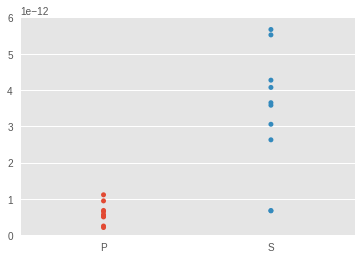

In [44]:
ax = sns.stripplot(data=df)
ax.set_autoscaley_on(True)
ax.set_ylim(1e-14,6e-12)
sns.plt.show()

### Swarmplot

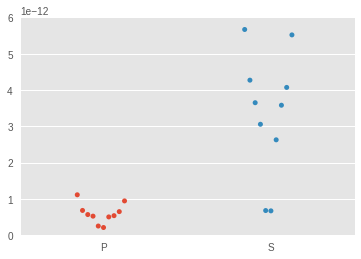

In [45]:
ax = sns.swarmplot(data=df)
ax.set_autoscaley_on(True)
ax.set_ylim(1e-14,6e-12)
sns.plt.show()

### Boxplot

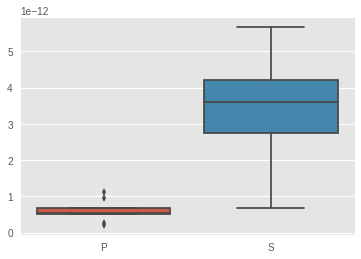

In [46]:
ax = sns.boxplot(data=df)
ax.set_autoscaley_on(True)
sns.plt.show()

### Violinplot

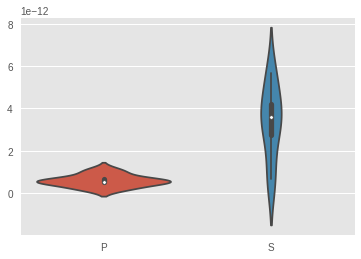

In [47]:
ax = sns.violinplot(data=df)
ax.set_autoscaley_on(True)
sns.plt.show()

### Lvplot

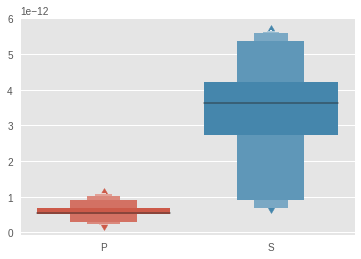

In [48]:
ax = sns.lvplot(data=df)
ax.set_autoscaley_on(True)
sns.plt.show()

### Pointplot

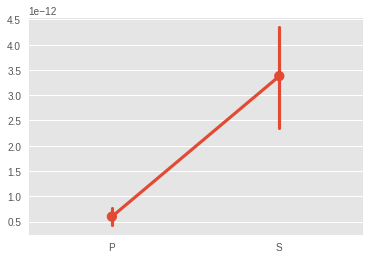

In [49]:
ax = sns.pointplot(data=df)
ax.set_autoscaley_on(True)
sns.plt.show()

### Barplot

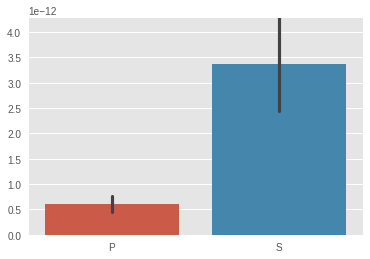

In [50]:
ax = sns.barplot(data=df)
ax.set_autoscaley_on(True)
sns.plt.show()

Pensamos que el que más información aporta a simple vista sin entrar en muchos detalles es el ViolinPlot. Por lo tanto los proximos puntos vamos a realizar los análisis con este gráfico.

- Para cada banda de frecuencia, graficar según lo elegido en el punto c) y realizar un test estadístico apropiado.

El test estadísto que vamos a realizar es para verificar si las muestras vienen de distribuciones con igual media

In [25]:
def plot_violin(df):
    ax = sns.violinplot(data=df)
    ax.set_autoscaley_on(True)
    sns.plt.show()
    
def test_same_mean(data1, data2):
    t, p_value = sp.stats.ttest_ind(data1, data2)
    print("P-Valor :" , p_value)
    return "No hay evidencia suficiente para rechazar la hipotesis nula" if (p_value > 0.05) else "Se rechaza la hipotesis nula"

def plot_and_test(banda):
    df = pd.DataFrame(banda, columns=list('PS'))
    plot_violin(df)
    print(test_same_mean(df['P'], df['S']))

#### Banda Delta (Delta < 4 Hz)

Datos Puros


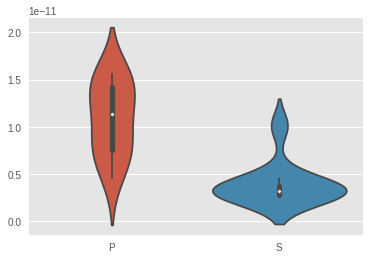

P-Valor : 0.000132454381023
Se rechaza la hipotesis nula

Datos Normalizados


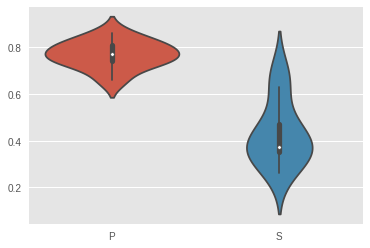

P-Valor : 1.11098532739e-06
Se rechaza la hipotesis nula


In [27]:
print("Datos Puros")
plot_and_test(delta)

print("")

print("Datos Normalizados")
plot_and_test(delta_norm)

#### Banda Theta (4 Hz <= Theta < 8 Hz)

Datos Puros


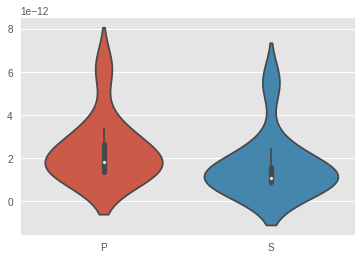

P-Valor : 0.286974844497
No hay evidencia suficiente para rechazar la hipotesis nula

Datos Normalizados


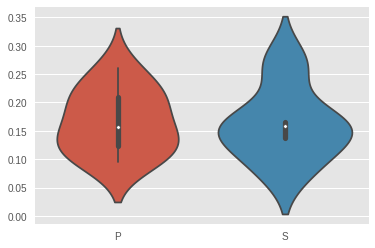

P-Valor : 0.898619953966
No hay evidencia suficiente para rechazar la hipotesis nula


In [28]:
print("Datos Puros")
plot_and_test(theta)

print("")

print("Datos Normalizados")
plot_and_test(theta_norm)

#### Banda Alpha (8 Hz <= Alpha < 13 Hz)

Datos Puros


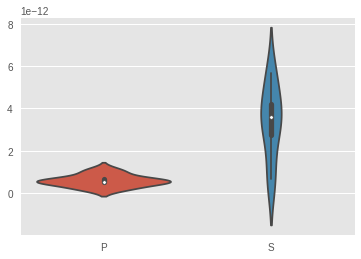

P-Valor : 8.15986172248e-05
Se rechaza la hipotesis nula

Datos Normalizados


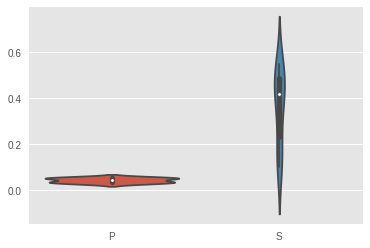

P-Valor : 7.89279993453e-06
Se rechaza la hipotesis nula


In [29]:
print("Datos Puros")
plot_and_test(alpha)

print("")

print("Datos Normalizados")
plot_and_test(alpha_norm)

#### Banda Beta (13 Hz <= Beta < 30 Hz)

Datos Puros


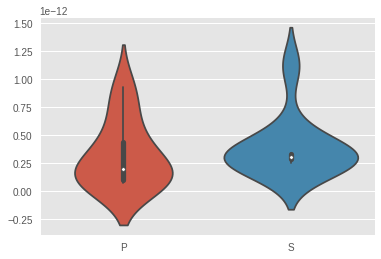

P-Valor : 0.580330026503
No hay evidencia suficiente para rechazar la hipotesis nula

Datos Normalizados


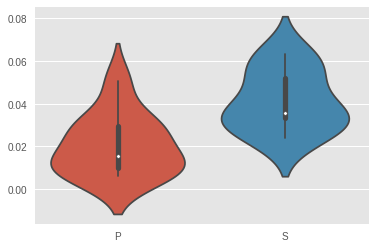

P-Valor : 0.00416120146756
Se rechaza la hipotesis nula


In [30]:
print("Datos Puros")
plot_and_test(beta)

print("")

print("Datos Normalizados")
plot_and_test(beta_norm)

#### Banda Gamma (30 Hz <= Gamma < Nyquist)

Datos Puros


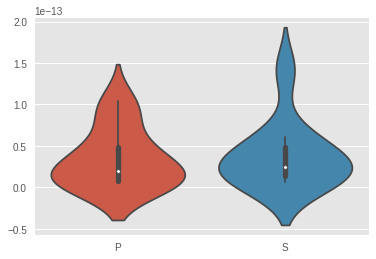

P-Valor : 0.817944526891
No hay evidencia suficiente para rechazar la hipotesis nula

Datos Normalizados


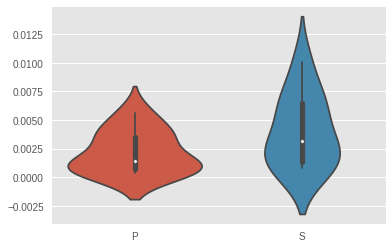

P-Valor : 0.129708678371
No hay evidencia suficiente para rechazar la hipotesis nula


In [31]:
print("Datos Puros")
plot_and_test(gamma)

print("")

print("Datos Normalizados")
plot_and_test(gamma_norm)

Podemos ver como en la banda Alpha de frecuencias, la diferencia entre las muestras de los pacientes con capacidades cognitivas noramles y aquellos que tiene la capacidad reducida son evidentemente distintas, arrojando un p-valor muy chico para el test estadístico, lo cual implica que la probabilidad de que las muestras venganda de una distribución con igual media es extremandamente pequeña.


## Análisis de Información

- Computar una medida de información intra-electrodo. Calcular la media entre canales y epochs para cada sujeto. Realizar el gráfico elegido en el punto c) de la sección anterior, acompañado del test estadístico apropiado.

In [66]:
pows = []
freqs = []
pacientes = [1]
for elect in welchs_by_elect_and_epoch:
    for epoch in elect:
        for welch in range(len(epoch[0])):
            if (epoch[0, welch] >= 8) and (epoch[0, welch] < 13):
                freqs.append(epoch[0, welch])
                pows.append(epoch[1, welch])


In [67]:
from scipy.stats import binned_statistic
# calculo el electrodo promedio
elec = matriz[:,1,:]

#discritizo los valores de amplitud (voltajes) en bins mediante la regla de Freedman-Diaconis.
bins =  (np.histogram(elec, bins='fd',density=False))
# bins tiene las cantidades de cada amplitud en los distintos bins [0] y las respuectivas frecuencias asociadas
#bins
#entropy(bins[0])
bins

(array([   1,    1,    0,    0,    0,    0,    0,    0,    0,    1,    0,
           0,    0,    0,    3,    0,    0,    0,    1,    1,    0,    0,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    1,
           0,    0,    0,    0,    1,    0,    2,    0,    0,    2,    2,
           2,    5,    8,    5,    7,    3,    7,   12,   11,    8,   11,
           8,    4,    3,   11,    6,    5,    4,    7,    9,    7,   10,
           7,   13,    6,    6,   13,   16,    6,    9,    7,   14,   14,
          12,   14,   11,   17,   16,   13,   11,   12,   14,   13,   19,
          26,   14,   14,   13,   17,   14,   10,   16,   11,   13,   14,
           8,   13,   16,    8,   12,   16,   15,   14,   13,   19,    7,
           6,   17,   11,   11,   13,   12,    6,   20,   20,   23,   17,
          13,   24,   28,   23,   26,   29,   25,   23,   32,   21,   41,
          42,   33,   36,   26,   41,   33,   42,   52,   50,   54,   72,
          55,   72,   66,   70,   59, 

In [2]:
def cantidad_informacion(elec):
    bins =  (np.histogram(elec, bins='fd',density=False)) 
    return entropy(bins[0])

# cantidad_informacion(matriz[:,1,:].mean(axis=0))

In [4]:

def cantidad_informacion_sujeto(matriz):
    cant_inf = []
    for i in range(matriz.shape[1]):
        cant_inf.append(cantidad_informacion(matriz[:,i,:]))
# plt.plot(cant_inf)
    return np.array(cant_inf).mean()


#plot de todas las cantidades de informacion por electrodo

In [5]:
mediasP = []
mediasS = []
path = "./"

for l in ['P','S']:
    for i in range(1,11):
        dat = io.loadmat('{0}data/{1}%02d.mat'.format(path,l) %i)
        mat = dat['data']
        media = cantidad_informacion_sujeto(mat)
        if l=='P':
            mediasP.append(media)
        else:
            mediasS.append(media)

In [6]:
medias = pd.DataFrame({"P":mediasP,"S":mediasS})

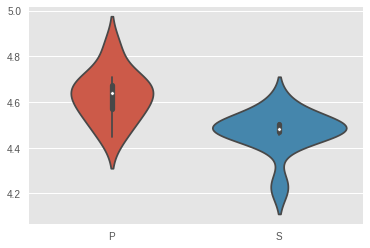

0.00270169493388
Se rechaza la hipotesis nula


In [9]:
plot_and_test(medias)

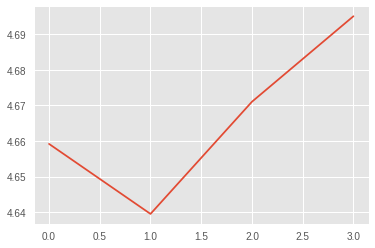

In [12]:
electrodo44 = matriz[:,43,:]
electrodo80 = matriz[:,79,:]
electrodo131 = matriz[:,130,:]
electrodo185 = matriz[:,184,:]

infs = []
infs.append(cantidad_informacion(electrodo44))
infs.append(cantidad_informacion(electrodo80))
infs.append(cantidad_informacion(electrodo131))
infs.append(cantidad_informacion(electrodo185))
plt.plot(infs)

/home/julio/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1142: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 20
  strip_data = group_data[hue_mask]


IndexError: index 10 is out of bounds for axis 0 with size 10

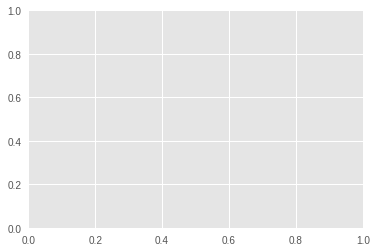

In [14]:
#calcular la media entre canales y epochs

sns.stripplot(medias)
matriz.nbytes

In [15]:
mediasP = []
mediasS = []
for l in ['P','S']:
    for i in range(1,11):
        dat = io.loadmat('{0}data/{1}%02d.mat'.format(path,l) %i)
        mat = dat['data']
        media = mat.mean(axis=0).mean(axis=0)
        if l=='P':
            mediasP.append(media)
        else:
            mediasS.append(media)



(1e-10, 1e-07)

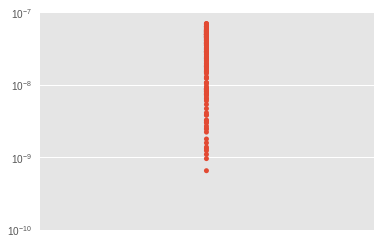

In [16]:
ax =sns.stripplot(y=mediasP[0]) # habria que agregar la de los otros pacientes
ax.set_yscale('log')
ax.set_ylim(1e-10,1e-7)

In [18]:
elec1 = matriz[:,0,:]

np.histogram(elec1)[0]

array([   114,    330,   1736,  15105, 142493,  17545,   1782,    433,
           97,     59])

- Repetir el punto a) para una medida inter-electrodo.

In [19]:
def informacion_mutua(elec1, elec2):
    bins_pares = np.histogram2d(elec1.flatten(), elec2.flatten())[0]
    bins_elec1  = np.histogram(elec1, bins='fd')[0]
    bins_elec2  = np.histogram(elec2, bins='fd')[0]
    
    H_xy = entropy(bins_pares.flatten())
#     print(str(H_xy),"entropia conjunta")
    H_x  = entropy(bins_elec1)
#     print(str(H_x),"entropia x")
    H_y  = entropy(bins_elec2)
#     print(str(H_y),"entropia y")
    
    return H_x + H_y - H_xy

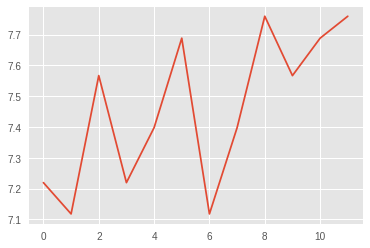

In [20]:
# calculo la medida de informacion inter electrodo
cant_inf2d = []
for i in [43,79,130,184]:
    for j in [43,79,130,184]:
        if i!=j:
            cant_inf2d.append(informacion_mutua(matriz[:,i,:],matriz[:,j,:]))
plt.plot(cant_inf2d)

In [21]:
cantidad_informacion2d(matriz[:,5,:],matriz[:,6,:])

NameError: name 'cantidad_informacion2d' is not defined